Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1576s 2s/step - accuracy: 0.3577 - loss: 2.6359 - val_accuracy: 0.5326 - val_loss: 1.4328
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1622s 2s/step - accuracy: 0.5587 - loss: 1.5708 - val_accuracy: 0.5267 - val_loss: 1.3662
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1584s 2s/step - accuracy: 0.6359 - loss: 1.2811 - val_accuracy: 0.5408 - val_loss: 2.9331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1689s 2s/step - accuracy: 0.6955 - loss: 1.0443 - val_accuracy: 0.6776 - val_loss: 1.0369
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1554s 2s/step - accuracy: 0.7323 - loss: 0.8868 - val_accuracy: 0.6872 - val_loss: 0.9484
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1567s 2s/step - accuracy: 0.7446 - loss: 0.8319 - val_accuracy: 0.4309 - val_loss: 2.0549
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1564s 2s/step - accuracy: 0.7552 - loss: 0.8206 - val_accuracy: 0.7094 - val_loss: 0.8704
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1568s 2s/step - accuracy: 0.7961 - loss: 0.6349 - 

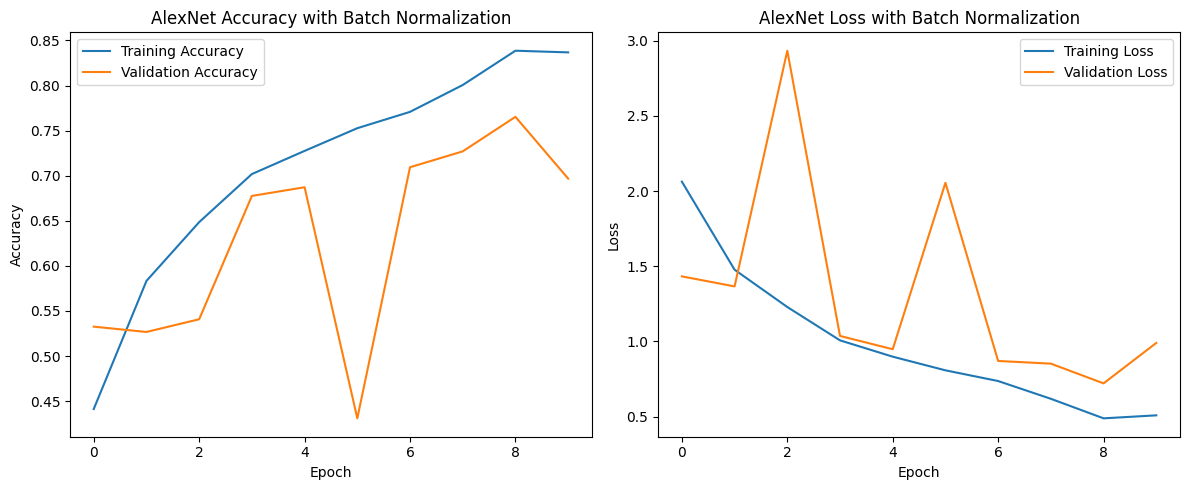

In [2]:
#I acknowledge using Artificial Intelligence for generating this code.

#Alexnet batch normalization

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define AlexNet model with Batch Normalization
def build_alexnet(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))
    # First Convolutional Layer with Batch Normalization
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Second Convolutional Layer with Batch Normalization
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers with Batch Normalization
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layers with Batch Normalization and Dropout
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Compile and train AlexNet with Batch Normalization
model = build_alexnet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AlexNet Accuracy with Batch Normalization')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('AlexNet Loss with Batch Normalization')

plt.tight_layout()
plt.show()
